In [1]:
pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=59848046846cf1c4c6671c81ec7106e75135dc16079d0385617b3479f4d5ee74
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
#import skfuzzy as fuzz
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2

True

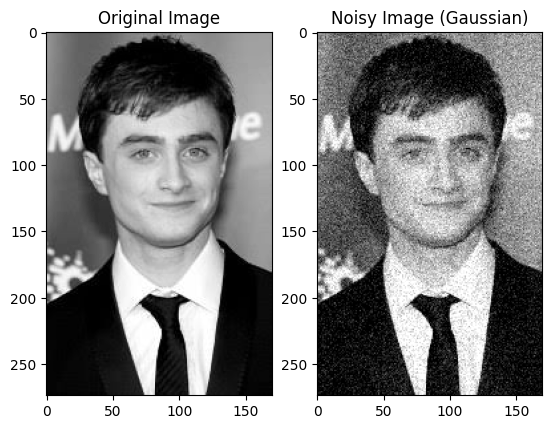

In [3]:

# adding noise to the data
#(a) gaussian noise
def add_gaussian_noise(image, mean=5, std=55):
    """
    Adds Gaussian noise to the input image.
    :param image: Grayscale image (numpy array)
    :param mean: Mean of the Gaussian distribution
    :param std: Standard deviation of the Gaussian distribution
    :return: Noisy image
    """
    noisy_image = np.copy(image)
    row, col = image.shape
    gauss = np.random.normal(mean, std, (row, col))
    noisy_image = noisy_image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip pixel values to [0, 255]
    return noisy_image.astype(np.uint8)
image_path = "/content/images - 2019-08-15T085504.381.jpg"
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Load a black and white image (replace with your own image)
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noisy_bw_image = add_gaussian_noise(bw_image, mean=0, std=25)

# Display the results
plt.subplot(121), plt.imshow(bw_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(noisy_bw_image, cmap="gray"), plt.title("Noisy Image (Gaussian)")



output_path = "/content/emma_noise(Gaussian).png"
cv2.imwrite(output_path, noisy_bw_image)

(<Axes: title={'center': 'Noisy Image (Random S&P)'}>,
 Text(0.5, 1.0, 'Noisy Image (Random S&P)'))

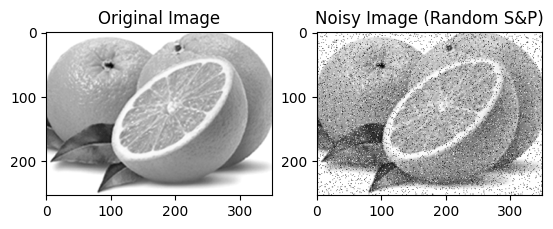

In [ ]:
import random
import cv2

def add_noise(img):

	# Getting the dimensions of the image
	row , col = img.shape

	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300, 10000)
	for i in range(number_of_pixels):

		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)

		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)

		# Color that pixel to white
		img[y_coord][x_coord] = 255

	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300 , 10000)
	for i in range(number_of_pixels):

		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)

		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)

		# Color that pixel to black
		img[y_coord][x_coord] = 0

	return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('/content/fruit25.jpg',
				cv2.IMREAD_GRAYSCALE)
image="/content/fruit25.jpg"
original_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

#Storing the image
cv2.imwrite('/content/emma/emma_noise(S&P).png',
			add_noise(img))
plt.subplot(121), plt.imshow(original_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(add_noise(original_image), cmap="gray"), plt.title("Noisy Image (Random S&P)")



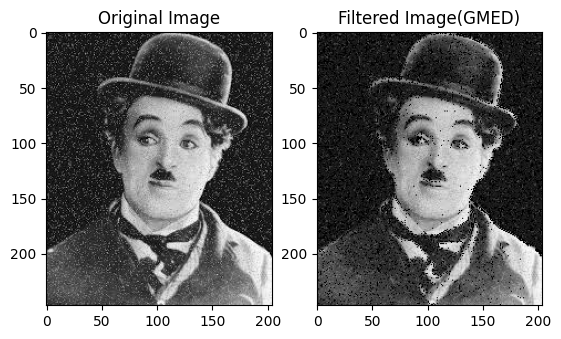

True

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skfuzzy as fuzz


image_path = "/content/noise_img2.jpeg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)
difference_image = cv2.absdiff(original_image, blurred_image)
fuzzy_difference = fuzz.gaussmf(difference_image, np.mean(difference_image),
                                np.std(difference_image))
threshold_value = 0.5
binary_mask = np.where(fuzzy_difference >= threshold_value, 255, 0).astype(np.uint8)
filtered_image = cv2.bitwise_and(original_image, binary_mask)
plt.subplot(121), plt.imshow(original_image, cmap="gray"), plt.title("Original Image")
#plt.subplot(132), plt.imshow(binary_mask, cmap="gray"), plt.title("Binary Mask")
plt.subplot(122), plt.imshow(filtered_image, cmap="gray"), plt.title("Filtered Image(GMED)")
plt.show()
output_path = "/content/charlie/charlie_noise_GMED.png"
cv2.imwrite(output_path, filtered_image)

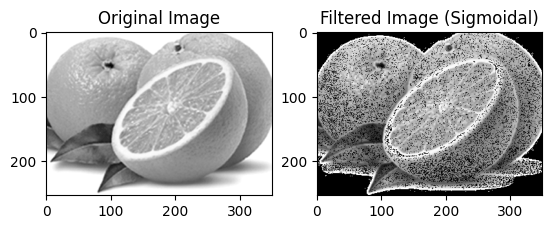

'\noutput_path = "/content/charlie/charlie_noise_sigmoidal.png"\ncv2.imwrite(output_path, filtered_image)\n'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skfuzzy as fuzz


image_path = "/content/fruit25.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)
difference_image = cv2.absdiff(original_image, blurred_image)
a, b = 0.6, 50
sigmoidal_mf = fuzz.sigmf(difference_image, a, b)
#creating binary mask
threshold_value = 0.6
binary_mask = np.where(sigmoidal_mf >= threshold_value, 255, 0).astype(np.uint8)

filtered_image = cv2.bitwise_and(original_image, binary_mask)
plt.subplot(121), plt.imshow(original_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(filtered_image, cmap="gray"), plt.title("Filtered Image (Sigmoidal)")
plt.show()
output_path = "/content/charlie/charlie_noise_sigmoidal.png"
cv2.imwrite(output_path, filtered_image)



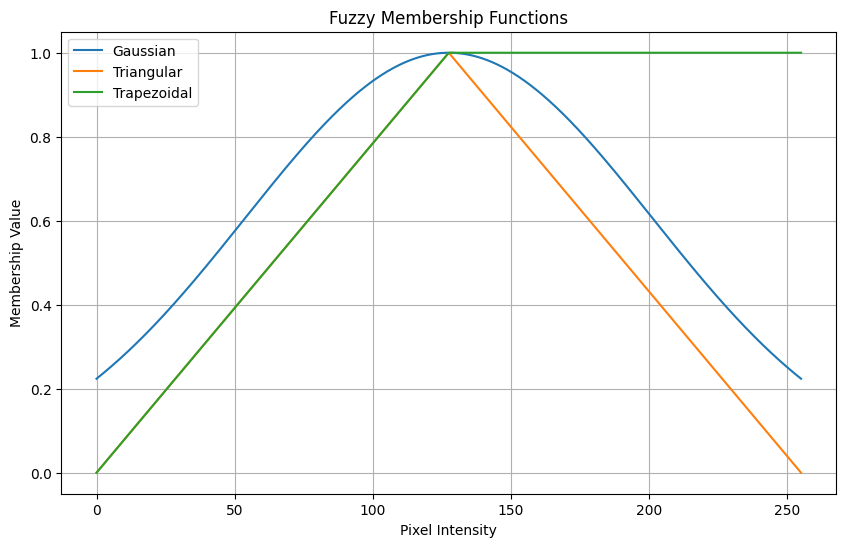

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Define the input range (e.g., pixel intensity values)
x = np.linspace(0, 255, 1000)

# Parameters for the membership functions
mean_value = np.mean(x)
std_dev = np.std(x)
a, b, c, d = np.min(x), np.mean(x), np.max(x), np.max(x)

# Calculate the membership values for each function
gaussian_mf = fuzz.gaussmf(x, mean_value, std_dev)
triangular_mf = fuzz.trimf(x, [a, b, c])
trapezoidal_mf = fuzz.trapmf(x, [a, b, c, d])

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_mf, label="Gaussian")
plt.plot(x, triangular_mf, label="Triangular")
plt.plot(x, trapezoidal_mf, label="Trapezoidal")
plt.xlabel("Pixel Intensity")
plt.ylabel("Membership Value")
plt.title("Fuzzy Membership Functions")
plt.grid(True)
plt.legend()
plt.show()


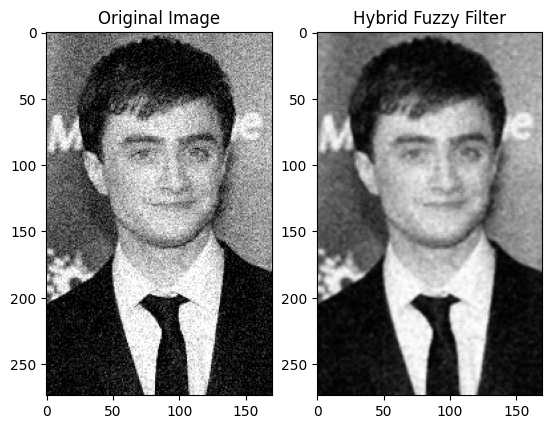

False

In [4]:
import cv2
import numpy as np

def hybrid_fuzzy_filter(image, window_size=3, weight_mean=0.7):
    if image is None or image.size == 0:
        print("Error: Invalid or empty image.")
        return None
    #  mean filter
    mean_filtered = cv2.blur(image, (window_size, window_size))
    #  median filter
    median_filtered = cv2.medianBlur(image, window_size)
    filtered_image = weight_mean * mean_filtered + (1 - weight_mean) * median_filtered

    return filtered_image

# Example usage
input_image_path = "/content/emma_noise(Gaussian).png"
original_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

filtered_image = hybrid_fuzzy_filter(original_image)
plt.subplot(121), plt.imshow(original_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122),plt.imshow(filtered_image, cmap="gray"), plt.title("Hybrid Fuzzy Filter")

plt.show()
output_path_ = "/content/charlie/charlie_noise_hybrid.png"
cv2.imwrite(output_path_, filtered_image)


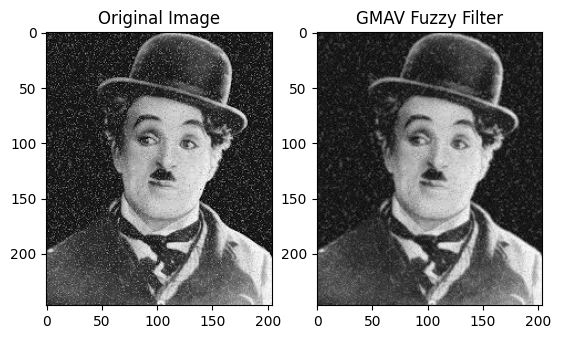

True

In [ ]:
import numpy as np
import cv2
import skfuzzy as fuzz

def gmav_filter(image, window_size=3, sigma=1.0):

    blurred_image = cv2.GaussianBlur(image, (window_size, window_size), sigma)
    mean_filtered = cv2.blur(image, (window_size, window_size))

    # Calculate the absolute difference between the original and blurred images
    difference_image = cv2.absdiff(image, blurred_image)

    # Fuzzify the difference image using the Gaussian membership function
    fuzzy_difference = fuzz.gaussmf(difference_image, np.mean(difference_image),
                                    np.std(difference_image))

    # Combine the filtered results
    filtered_image = (1 - fuzzy_difference) * mean_filtered + fuzzy_difference * image

    return filtered_image

# Example usage
input_image_path = "/content/noise_img2.jpeg"
original_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
filtered_image = gmav_filter(original_image)

plt.subplot(121), plt.imshow(original_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122),plt.imshow(filtered_image, cmap="gray"), plt.title("GMAV Fuzzy Filter")

plt.show()
output_path_trapezoidal = "/content/charlie/charlie_noise_GMAV.png"
cv2.imwrite(output_path_trapezoidal, filtered_image)



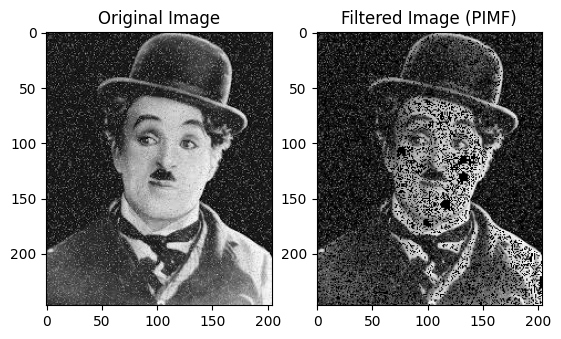

True

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Load a grayscale image (replace with your own image)
image_path = "/content/noise_img2.jpeg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)

# Calculate the absolute difference between the original and blurred images
difference_image = cv2.absdiff(original_image, blurred_image)

# Flatten the difference image to a one-dimensional array
difference_image_flat = difference_image.flatten()

# Fuzzify the flattened difference image using the PIMF (Pi-shaped) membership function
# Parameters for the PIMF
a, b, c, d = np.min(difference_image_flat), np.mean(difference_image_flat), np.mean(difference_image_flat), np.max(difference_image_flat)
pimf = fuzz.pimf(difference_image_flat, a, b, c, d)

# Reshape the fuzzy difference array back to the original image shape
pimf_image = pimf.reshape(original_image.shape)

# Threshold the fuzzy difference image to create a binary mask
threshold_value = 0.1 # Adjust as needed
binary_mask = np.where(pimf_image >= threshold_value, 255, 0).astype(np.uint8)

# Combine the binary mask with the original image
filtered_image = cv2.bitwise_and(original_image, binary_mask)

# Display the results

plt.subplot(121), plt.imshow(original_image, cmap="gray"), plt.title("Original Image")
#plt.subplot(132), plt.imshow(binary_mask, cmap="gray"), plt.title("Binary Mask (PIMF)")
plt.subplot(122), plt.imshow(filtered_image, cmap="gray"), plt.title("Filtered Image (PIMF)")
plt.show()

output_path_trapezoidal = "/content/charlie/charlie_noise_PIMF.png"
cv2.imwrite(output_path_trapezoidal, filtered_image)

In [ ]:
#PSNR from the original image
import os
import numpy as np
import cv2

# Specify the directory containing the filtered images
directory_path = '/content/charlie'

# Get a list of all image filenames in the directory
image_filenames = [filename for filename in os.listdir(directory_path) if filename.endswith('.png')]

# Load original image (assuming it's the same for all filtered images)
original_img = cv2.imread('/content/noise_img2.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate PSNR for each filtered image
for filename in image_filenames:
    filtered_img = cv2.imread(os.path.join(directory_path, filename), cv2.IMREAD_GRAYSCALE)
    mse = np.mean((original_img - filtered_img) ** 2)
    max_intensity=255.0
    psnr = 10 * np.log10((max_intensity ** 2) / mse)
    print(f"PSNR for {filename}: {psnr:.2f}")


PSNR for charlie_noise_GMED.png: 37.56
PSNR for charlie_noise_hybrid.png: 29.26
PSNR for charlie_noise_GMAV.png: 34.93
PSNR for charlie_noise_sigmoidal.png: 43.34
